In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
#Loading the dataset
data = pd.read_csv('/content/sample_data/train.csv')

In [3]:
data.shape

(1058, 35)

In [7]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


In [8]:
#Get the basic information of the dataset and the feature's datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [9]:
#Count the empty (NaN, NAN, na) values in each column
data.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [10]:
#View some basic statistical details like percentile, mean, standard deviation etc.
data.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [11]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
data['Attrition'].value_counts()

,count
Attrition,
0,879
1,179


<Axes: xlabel='Attrition', ylabel='count'>

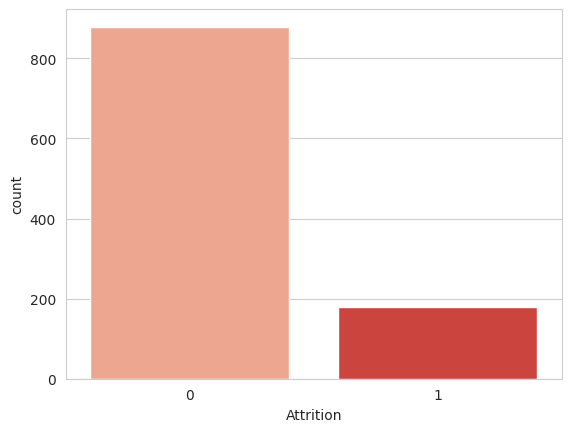

In [12]:
#Visualize this count
data['Attrition'].value_counts()
sns.set_style('whitegrid')
sns.countplot(x='Attrition', data=data, palette='Reds', hue = None, legend=False)

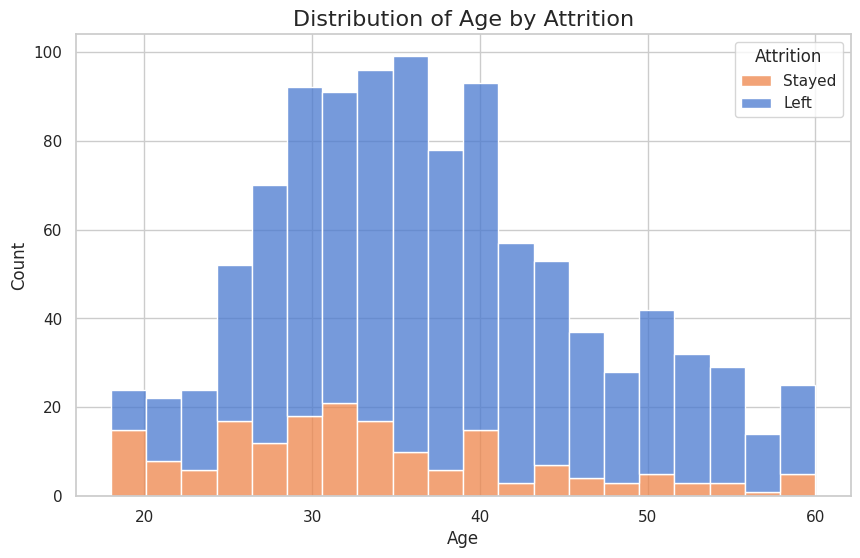

In [13]:
#Visualising Attrition dependency on age

# Setting up the plotting style
sns.set(style="whitegrid")

# Plot Attrition vs. Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack', kde=False, palette='muted', bins=20)
plt.title('Distribution of Age by Attrition', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

**Observation**: As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

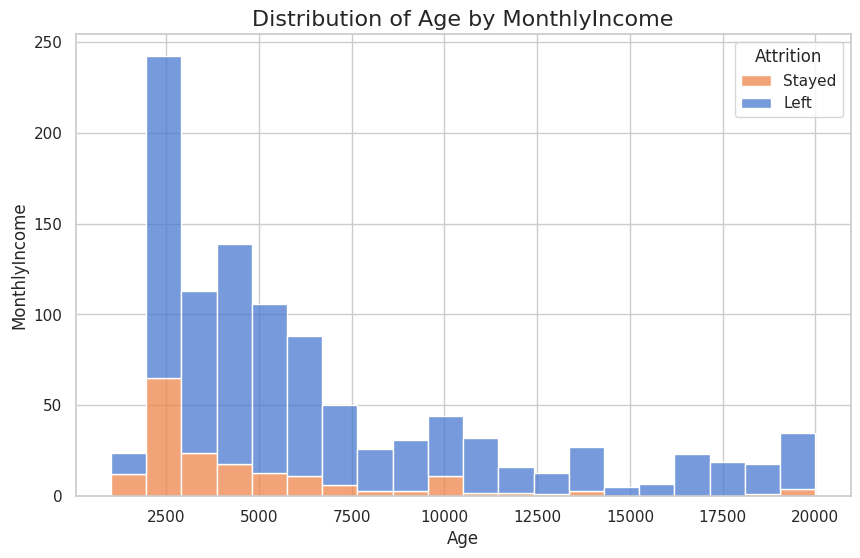

In [14]:
#Visualising Attrition dependency on Employee's income

# Setting up the plotting style
sns.set(style="whitegrid")

# Plot Attrition vs. Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=False, palette='muted', bins=20)
plt.title('Distribution of Age by MonthlyIncome', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('MonthlyIncome', fontsize=12)
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

**Observation**: As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

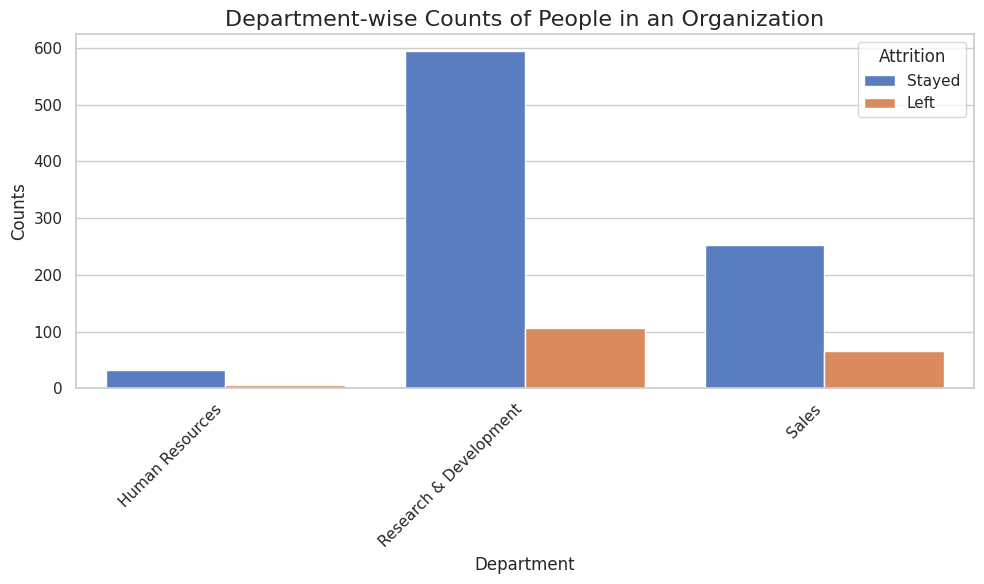

In [15]:
#Visualising Attrition dependency on Employee's Department

# Group by Department and Attrition to calculate counts
dept_att = data.groupby(['Department', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Replace Attrition values for better readability in the plot
dept_att['Attrition'] = dept_att['Attrition'].replace({0: 'Stayed', 1: 'Left'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=dept_att, x='Department', y='Counts', hue='Attrition', palette='muted')
plt.title('Department-wise Counts of People in an Organization', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title='Attrition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Observations**: This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

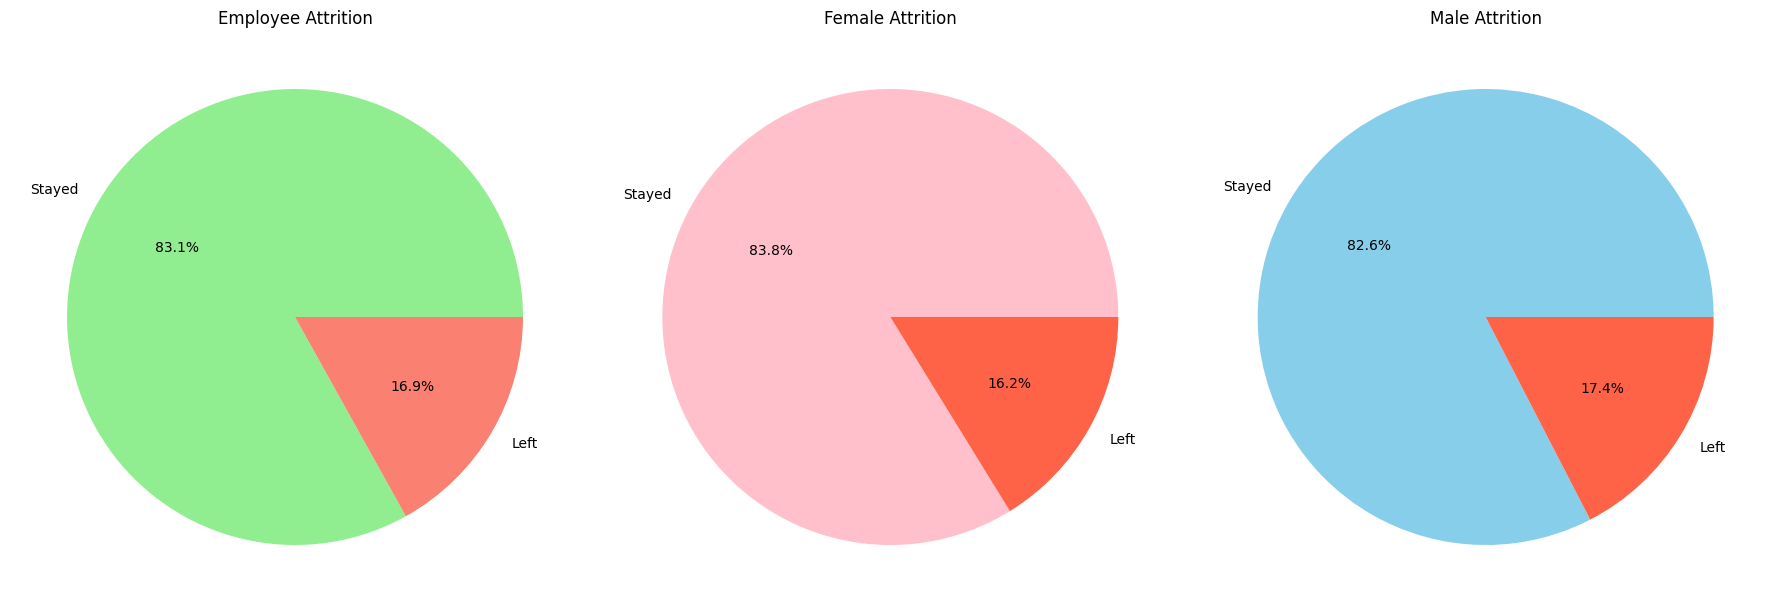

In [5]:
#Visualising Attrition dependency on Employee's Gender

# Grouping data for overall attrition
att1 = data.groupby('Attrition', as_index=False)['Age'].count()
att1['Count'] = att1['Age']
att1.drop('Age', axis=1, inplace=True)

# Grouping data for attrition by gender
att2 = data.groupby(['Gender', 'Attrition'], as_index=False)['Age'].count()
att2['Count'] = att2['Age']
att2.drop('Age', axis=1, inplace=True)

# Preparing data for pie charts
overall_counts = att1['Count'].values
female_counts = att2[att2['Gender'] == 'Female']['Count'].values
male_counts = att2[att2['Gender'] == 'Male']['Count'].values

# Creating pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Overall Attrition
axes[0].pie(overall_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
axes[0].set_title('Employee Attrition')

# Female Attrition
axes[1].pie(female_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', colors=['pink', 'tomato'])
axes[1].set_title('Female Attrition')

# Male Attrition
axes[2].pie(male_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', colors=['skyblue', 'tomato'])
axes[2].set_title('Male Attrition')

plt.tight_layout()
plt.show()

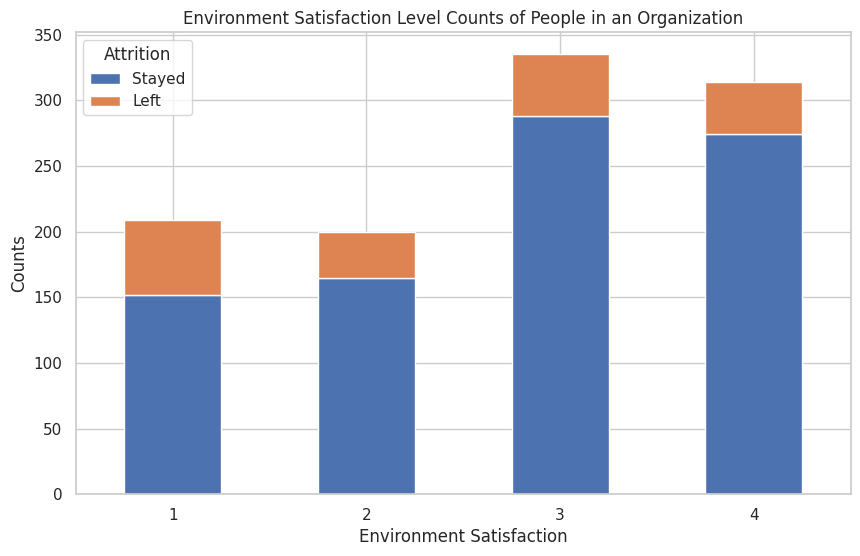

In [17]:
#Visualising Attrition dependency on Employee's Enviroment satisfaction rating

sats_att = data.groupby(['EnvironmentSatisfaction', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

# Pivot the data for plotting
sats_att = sats_att.pivot(index='EnvironmentSatisfaction', columns='Attrition', values='Counts')


# Create the stacked bar chart
sats_att.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Environment Satisfaction Level Counts of People in an Organization')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Attrition')
plt.legend(title = 'Attrition', labels = ['Stayed', 'Left'])

plt.show()

**Observation**: In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

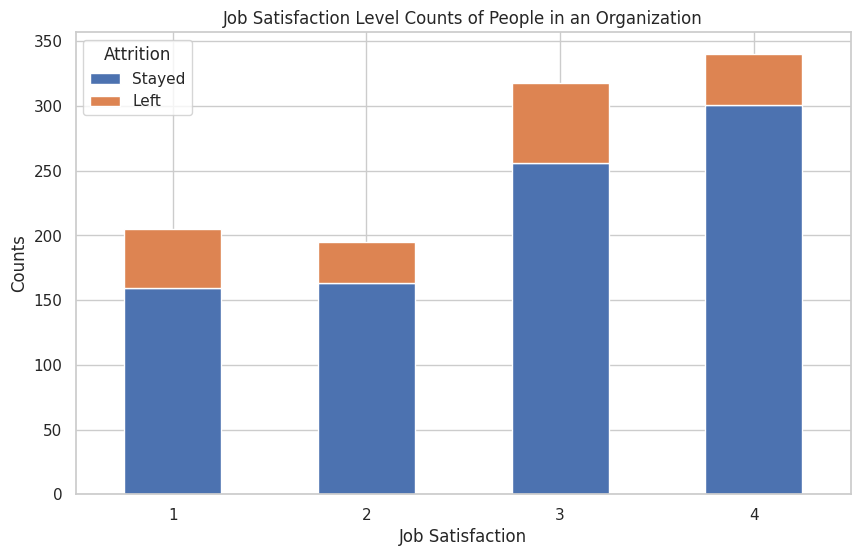

In [18]:
#Visualising Attrition dependency on Employee's Job satisfaction rating

job_att = data.groupby(['JobSatisfaction', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

# Pivot the data for plotting
job_att = job_att.pivot(index='JobSatisfaction', columns='Attrition', values='Counts')


# Create the stacked bar chart
job_att.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Job Satisfaction Level Counts of People in an Organization')
plt.xlabel('Job Satisfaction')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Attrition')
plt.legend(title = 'Attrition', labels = ['Stayed', 'Left'])

plt.show()

**Observation**: With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to choose better opportunities.

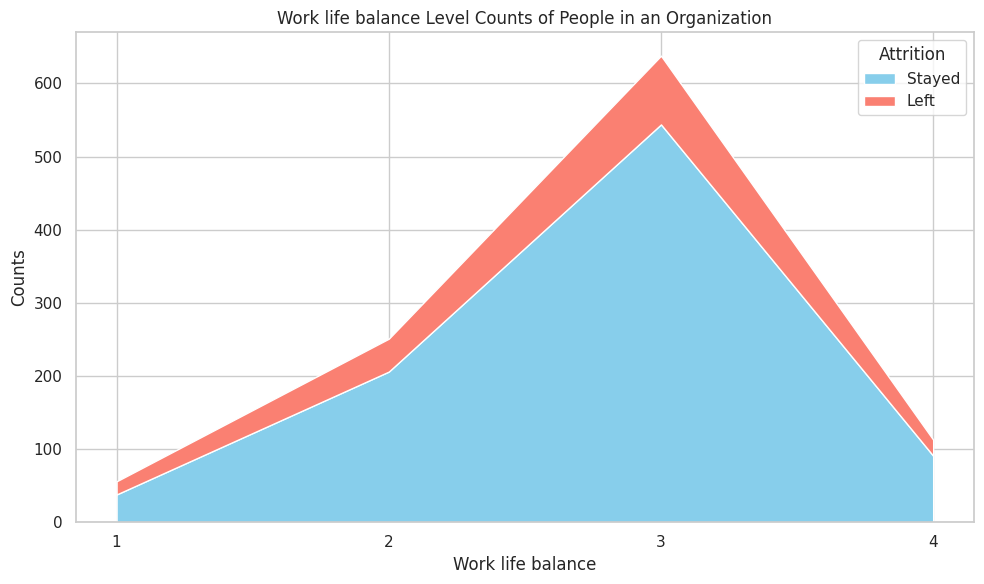

In [19]:
#Visualising Attrition dependency on Employee's Work Life Balance ratings

wlb_att = data.groupby(['WorkLifeBalance','Attrition'])['DailyRate'].count().reset_index(name='Counts')
wlb_att = wlb_att.pivot(index='WorkLifeBalance', columns='Attrition', values='Counts').fillna(0)

wlb_att.columns = ['Stayed', 'Left']

#Area chart
plt.figure(figsize=(10, 6))
plt.stackplot(wlb_att.index, wlb_att['Stayed'], wlb_att['Left'], labels=['Stayed', 'Left'], colors=['skyblue', 'salmon'])
plt.title('Work life balance Level Counts of People in an Organization')
plt.xlabel('Work life balance')
plt.ylabel('Counts')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(ticks=wlb_att.index, labels=wlb_att.index, rotation=0)
plt.tight_layout()
plt.show()



**Observation**: People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

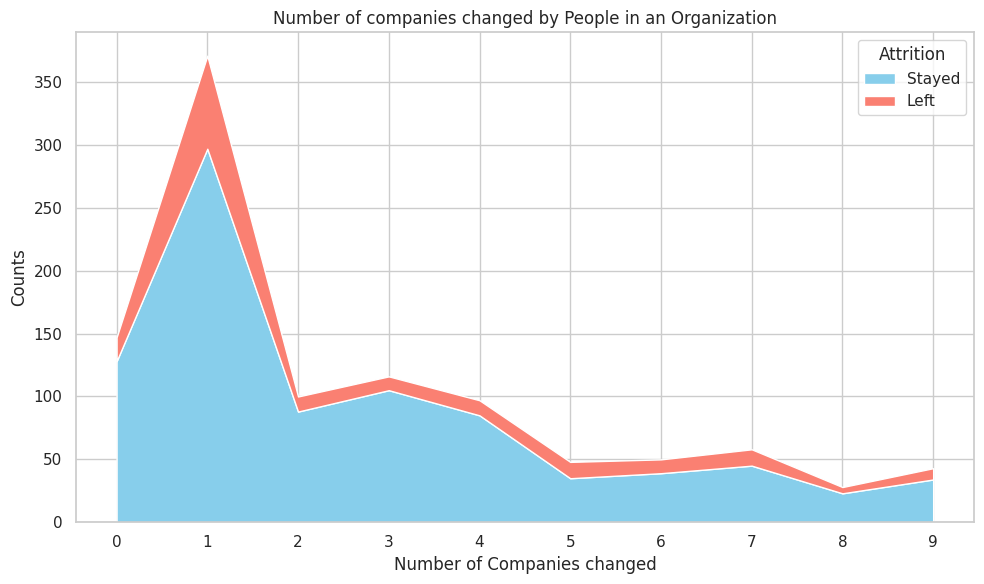

In [20]:
#Visualising Attrition dependency on Employee's work experience

wexp_att = data.groupby(['NumCompaniesWorked','Attrition'])['DailyRate'].count().reset_index(name='Counts')
wexp_att = wexp_att.pivot(index='NumCompaniesWorked', columns='Attrition', values='Counts').fillna(0)

wexp_att.columns = ['Stayed', 'Left']

#Area chart
plt.figure(figsize=(10, 6))
plt.stackplot(wexp_att.index, wexp_att['Stayed'], wexp_att['Left'], labels=['Stayed', 'Left'], colors=['skyblue', 'salmon'])
plt.title('Number of companies changed by People in an Organization')
plt.xlabel('Number of Companies changed')
plt.ylabel('Counts')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(ticks=wexp_att.index, labels=wexp_att.index, rotation=0)
plt.tight_layout()
plt.show()

**Observations**: As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

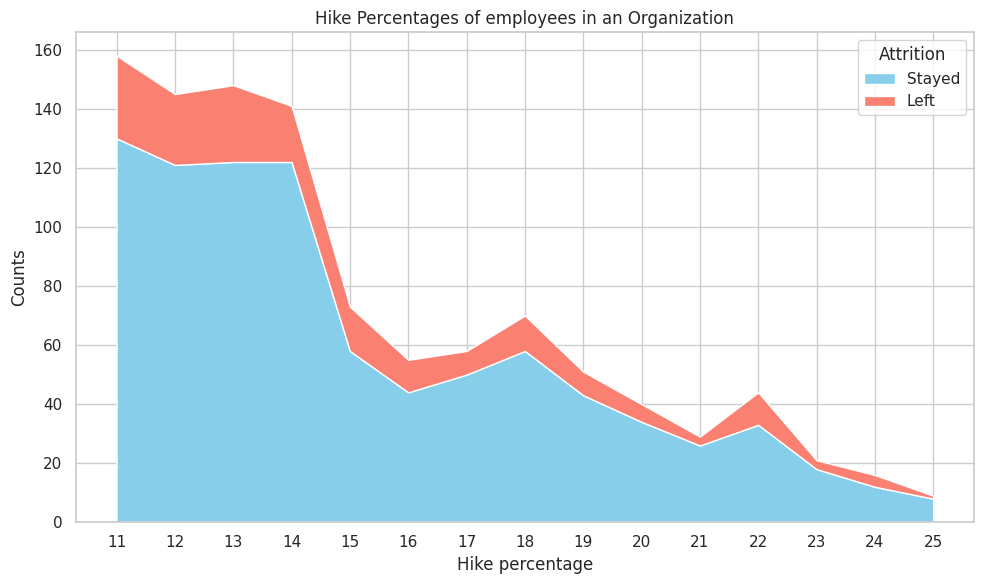

In [21]:
#Visualising Attrition dependency on Employee's Hike

whk_att = data.groupby(['PercentSalaryHike','Attrition'])['DailyRate'].count().reset_index(name='Counts')
whk_att = whk_att.pivot(index='PercentSalaryHike', columns='Attrition', values='Counts').fillna(0)

whk_att.columns = ['Stayed', 'Left']

#Area chart
plt.figure(figsize=(10, 6))
plt.stackplot(whk_att.index, whk_att['Stayed'], whk_att['Left'], labels=['Stayed', 'Left'], colors=['skyblue', 'salmon'])
plt.title('Hike Percentages of employees in an Organization')
plt.xlabel('Hike percentage')
plt.ylabel('Counts')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(ticks=whk_att.index, labels=whk_att.index, rotation=0)
plt.tight_layout()
plt.show()

**Observation**: Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

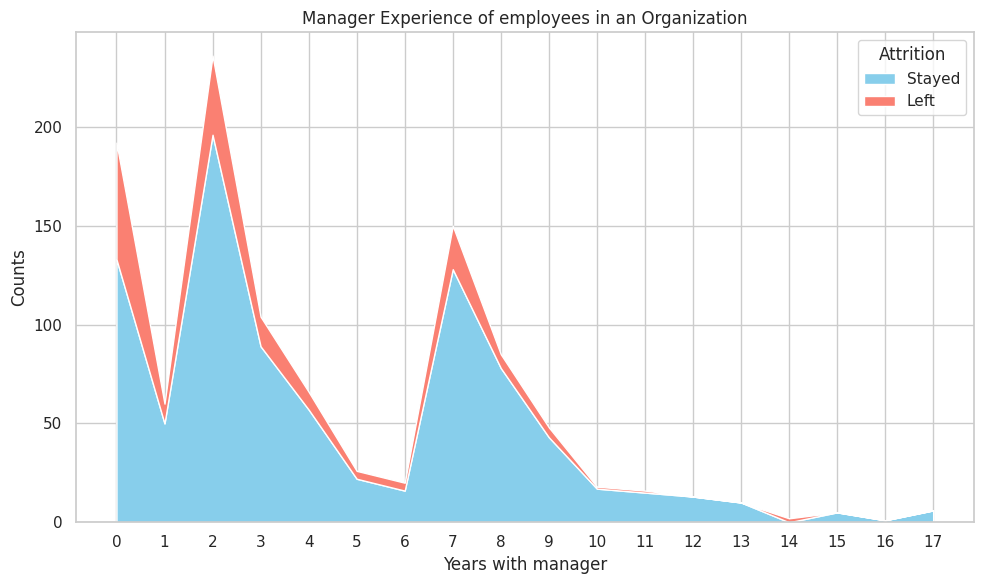

In [22]:
#Visualising Attrition dependency on Employee's experience count with manager

wm_att = data.groupby(['YearsWithCurrManager','Attrition'])['DailyRate'].count().reset_index(name='Counts')
wm_att = wm_att.pivot(index='YearsWithCurrManager', columns='Attrition', values='Counts').fillna(0)

wm_att.columns = ['Stayed', 'Left']

#Area chart
plt.figure(figsize=(10, 6))
plt.stackplot(wm_att.index, wm_att['Stayed'], wm_att['Left'], labels=['Stayed', 'Left'], colors=['skyblue', 'salmon'])
plt.title('Manager Experience of employees in an Organization')
plt.xlabel('Years with manager')
plt.ylabel('Counts')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(ticks=wm_att.index, labels=wm_att.index, rotation=0)
plt.tight_layout()
plt.show()

**Observation**: We can see 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager. At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

# DATA PRE-PROCESSING

In [23]:
def onehot_encode(df, column):
  df = df.copy()
  dummies = pd.get_dummies(df[column], prefix=column, dtype = int)
  df = pd.concat([df, dummies], axis = 1)
  df = df.drop(column, axis = 1)
  return df




In [24]:
def preprocess_inputs(df):
  df = df.copy()

  #Dropping single-value columns and id-columns
  df = df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis = 1)

  #Binary-encode Binary columns
  df['Gender'] = df['Gender'].replace({"Female" : 0, "Male" : 1})
  df['OverTime'] = df['OverTime'].replace({"No" : 0, "Yes" : 1})

  #Ordinal-encode BusinessTravel column
  df['BusinessTravel'] = df['BusinessTravel'].replace({"Non-Travel" : 0, "Travel_Rarely" : 1, "Travel_Frequently" : 2})

  # One-hot encoding
  for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
    df = onehot_encode(df, column = column)

  #Spliting and scaling the data
  y = df['Attrition']
  X = df.drop('Attrition', axis = 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

  return X_train, X_test, y_train, y_test



In [25]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [26]:
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
69,-0.151184,-0.178690,-1.225782,-0.001490,0.049628,1.171467,0.877687,0.668363,-1.036543,-0.989936,...,-0.463796,-0.288886,-0.338316,-0.242188,2.008485,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
491,0.589717,1.710319,0.449329,-0.001490,2.034728,1.171467,0.877687,0.320760,0.399865,-0.092200,...,2.156120,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,1.845200,-0.899606,-0.694958
1024,1.013090,-0.178690,-1.125226,-0.858797,1.042178,-1.574739,-1.139358,0.817335,0.399865,1.703272,...,-0.463796,-0.288886,-0.338316,4.129017,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
781,-1.209614,-0.178690,-1.534806,-0.981270,-0.942923,-1.574739,0.877687,-0.324787,-1.036543,-0.989936,...,2.156120,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
757,-0.362870,-0.178690,-1.475944,-0.981270,1.042178,-0.659337,0.877687,0.469733,1.836274,-0.092200,...,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,1.852333,-0.239046,1.845200,-0.899606,-0.694958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.378031,1.710319,0.491023,-0.981270,0.049628,0.256065,-1.139358,0.022816,0.399865,-0.092200,...,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,1.852333,-0.239046,1.845200,-0.899606,-0.694958
847,-0.362870,1.710319,-0.364927,-0.981270,0.049628,1.171467,0.877687,1.562197,-1.036543,-0.092200,...,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,-0.541947,-0.899606,1.438937
715,-0.468713,1.710319,0.022580,-0.981270,1.042178,0.256065,-1.139358,0.916650,1.836274,-0.092200,...,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
905,-0.892085,-0.178690,-0.303612,-0.981270,0.049628,1.171467,-1.139358,1.065622,-1.036543,1.703272,...,-0.463796,-0.288886,-0.338316,4.129017,-0.497888,-0.539860,-0.239046,1.845200,-0.899606,-0.694958


# **Model Training**

LOGISTIC REGRESSION

In [27]:
model1 = LogisticRegression()

# Train the model using the training data
model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model1.predict(X_test)

In [28]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8710691823899371


## K-Nearest Neighbors

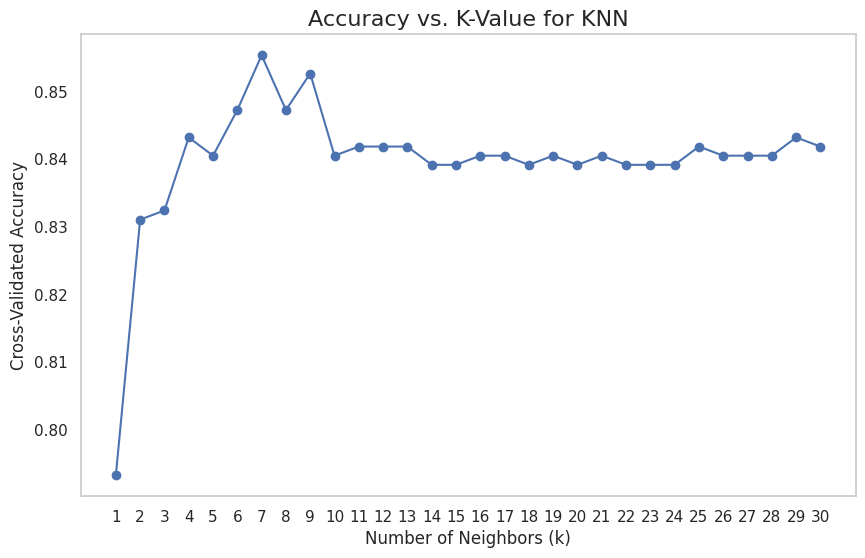

The optimal k value is 7 with an accuracy of 85.5405%


In [29]:
k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    scores.append(cv_scores.mean())

# Plotting the accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K-Value for KNN', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Cross-Validated Accuracy', fontsize=12)
plt.xticks(k_range)
plt.grid()
plt.show()

# Selecting the optimal k value
optimal_k = k_range[scores.index(max(scores))]
print(f"The optimal k value is {optimal_k} with an accuracy of {max(scores) * 100 :.4f}%")

Decision Tree Classifier

In [30]:
# Create a Decision Tree Classifier instance
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.7547169811320755


Linear SVC

In [31]:
linear_svc_model = LinearSVC(random_state=42)  # Create LinearSVC instance
linear_svc_model.fit(X_train, y_train)  # Train the model
y_pred_linear = linear_svc_model.predict(X_test)  # Make predictions

accuracy_linear = accuracy_score(y_test, y_pred_linear)  # Calculate accuracy
print(f"LinearSVC Accuracy: {accuracy_linear}")

LinearSVC Accuracy: 0.8647798742138365


SVC(RBF Kernel)

In [32]:
svc_model = SVC(random_state=42)  # Create SVC instance (default kernel is 'rbf')
svc_model.fit(X_train, y_train)  # Train the model
y_pred_svc = svc_model.predict(X_test)  # Make predictions

accuracy_svc = accuracy_score(y_test, y_pred_svc)  # Calculate accuracy
print(f"SVC Accuracy: {accuracy_svc}")

SVC Accuracy: 0.8301886792452831


Multi-layer Perceptron classifier

In [33]:
# Create an MLPClassifier instance
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42, max_iter=500)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"MLPClassifier Accuracy: {accuracy}")

MLPClassifier Accuracy: 0.8301886792452831


RANDOM FOREST CLASSIFIER

In [34]:
# Create a Random Forest Classifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.8270440251572327


In [37]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[255,   2],
       [ 53,   8]])

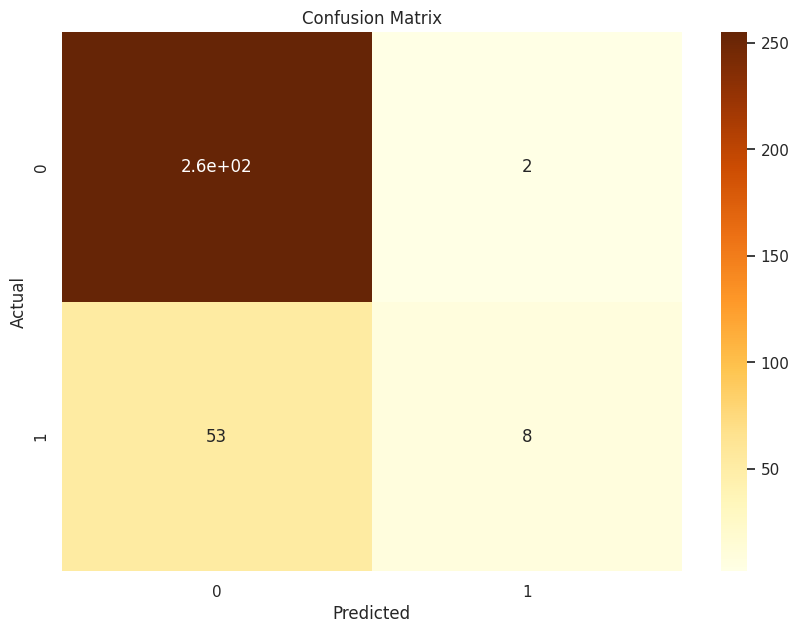

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlOrBr")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
report = classification_report(y_test, y_pred, output_dict=True)
cr = pd.DataFrame(report).transpose()
display(cr)

,precision,recall,f1-score,support
0,0.827922,0.992218,0.902655,257.000000
1,0.800000,0.131148,0.225352,61.000000
accuracy,0.827044,0.827044,0.827044,0.827044
macro avg,0.813961,0.561683,0.564003,318.000000
weighted avg,0.822566,0.827044,0.772732,318.000000


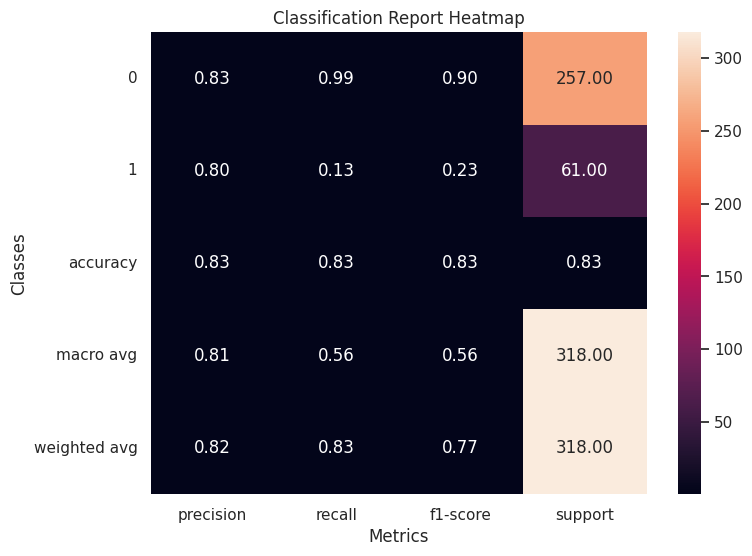

In [45]:
#visualizing classification report
plt.figure(figsize=(8, 6))
sns.heatmap(cr, annot=True, fmt=".2f")
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

AdaBoost

In [47]:
# 1. AdaBoost
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # Creating AdaBoost instance
ada_model.fit(X_train, y_train)  # Train the model
y_pred_ada = ada_model.predict(X_test)  # Make predictions
accuracy_ada = accuracy_score(y_test, y_pred_ada)  # Calculate accuracy
print(f"AdaBoost Accuracy: {accuracy_ada}")

AdaBoost Accuracy: 0.8522012578616353


In [48]:
# Classification Report for AdaBoost
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       257
           1       0.85      0.28      0.42        61

    accuracy                           0.85       318
   macro avg       0.85      0.63      0.67       318
weighted avg       0.85      0.85      0.82       318



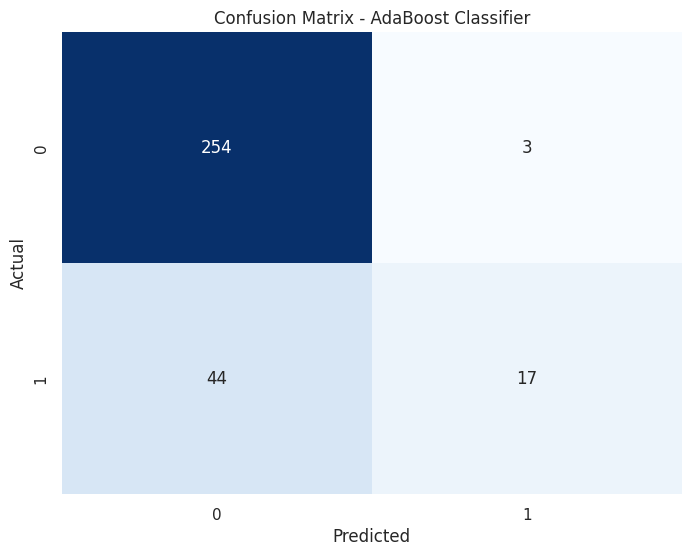

In [50]:
# Confusion Matrix for AdaBoost
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()

Gradient Boosting

In [51]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Create Gradient Boosting instance
gb_model.fit(X_train, y_train)  # Train the model
y_pred_gb = gb_model.predict(X_test)  # Make predictions
accuracy_gb = accuracy_score(y_test, y_pred_gb)  # Calculate accuracy
print(f"\nGradient Boosting Accuracy: {accuracy_gb}")


Gradient Boosting Accuracy: 0.8301886792452831


In [52]:
# Classification Report for Gradient Boosting
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       257
           1       0.63      0.28      0.39        61

    accuracy                           0.83       318
   macro avg       0.74      0.62      0.64       318
weighted avg       0.81      0.83      0.80       318



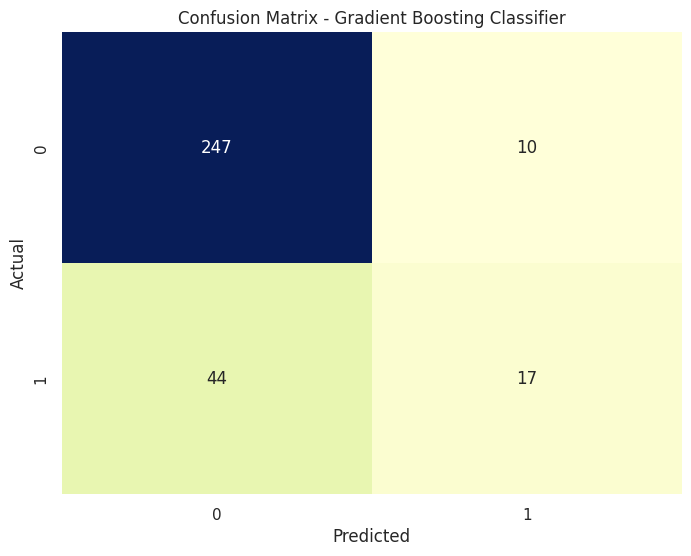

In [54]:
# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

# **CONCLUSION**

Accuracy for all the models came out to be as follows:




1.   Logistic Regression: 87.10%
2.   K-Nearest Neighbors: 85.54%
3.   Decision Tree: 75.47%
4.   Support Vector Machine (Linear Kernel): 86.47%
5.   Support Vector Machine (RBF Kernel): 83.01%
6.   Neural Network: 83.01%
7.   Random Forest: 82.70%
8.   AdaBoost: 85.22%
9.   Gradient Boosting: 83.01%









